In [2]:
import bert
import samples
import sklearn.mixture
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as  plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *
import pdb
import umap
import hdbscan


from numpy import dot
from numpy.linalg import norm
from sklearn.metrics import silhouette_score


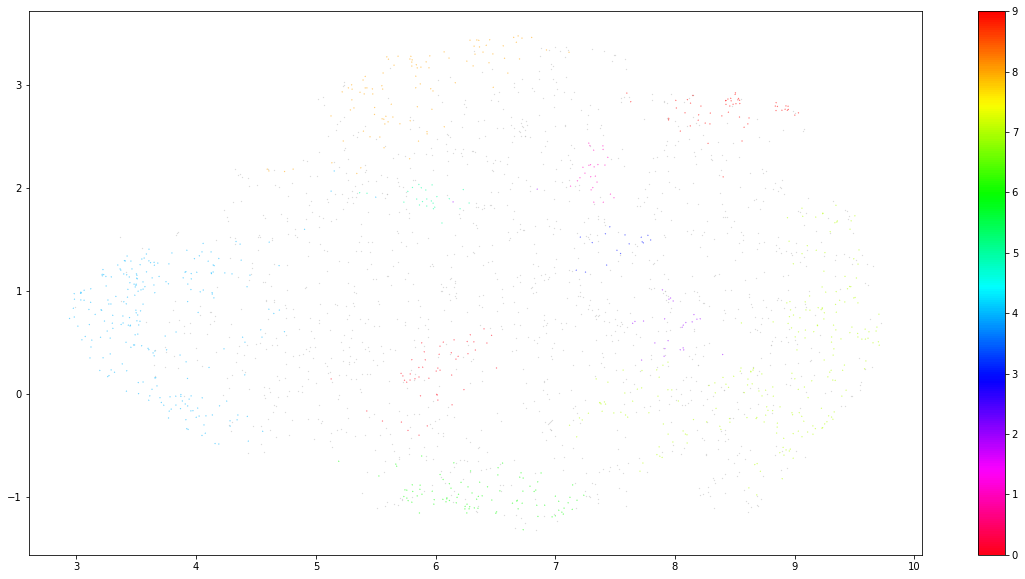

In [3]:
nips_df = pd.read_csv("nips_2022_clean.csv")
embeddings = load_embeddings("outputs/clean_nips_2022_embeddings.pkl")
# embeddings = [x.numpy() for x in embeddings]
embeddings = np.array(embeddings)
# reduce dimensions to 5 using umap
reduced_embeddings = reduce_dim(embeddings, "umap", 5)
# reduced_embeddings = embeddings
# cluster
clusters, model = cluster_and_predict(reduced_embeddings, "dbscan", num_cluster=10)

visualize(embeddings, clusters.labels_)

# # calculate metric
# print(silhouette_score(reduced_embeddings , clusters.labels_))

# import matplotlib.pyplot as plt

# # Prepare data
# umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

# # fig, ax = plt.subplots()
# # ax.scatter(umap_data[:,0], umap_data[:,1], c=clusters)
# # plt.show()

# # for dbscan visuals
# result = pd.DataFrame(umap_data, columns=['x', 'y'])
# result['labels'] = clusters.labels_

# # Visualize clusters
# fig, ax = plt.subplots(figsize=(20, 10))
# outliers = result.loc[result.labels == -1, :]
# clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
# plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
# plt.colorbar()
# plt.show()


In [ ]:
def visualize(embeddings, labels):
    umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

    result = pd.DataFrame(umap_data, columns=['x', 'y'])

    result['labels'] = labels

    fig, ax = plt.subplots(figsize=(20, 10))
    outliers = result.loc[result.labels == -1, :]
    clustered = result.loc[result.labels != -1, :]
    plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
    plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
    plt.colorbar()
    plt.show()

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

# fig, ax = plt.subplots()
# ax.scatter(umap_data[:,0], umap_data[:,1], c=clusters)
# plt.show()

# for dbscan visuals
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = clusters.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()
plt.show()

In [64]:

print(silhouette_score(reduced_embeddings , clusters.labels_))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [21]:
nips_df

,Unnamed: 0,title,authors,abstract,year
0,0,Federated Submodel Optimization for Hot and Co...,"Yucheng Ding, Chaoyue Niu, Fan Wu, Shaojie Tan...",We focus on federated learning in practical re...,2022
1,1,On Kernelized Multi-Armed Bandits with Constra...,"Xingyu Zhou, Bo Ji",We study a stochastic bandit problem with a ge...,2022
2,3,Structured Recognition for Generative Models w...,"Changmin Yu, Hugo Soulat, Neil Burgess, Manees...",A key goal of unsupervised learning is to go b...,2022
3,4,Fast Bayesian Coresets via Subsampling and Qua...,"Cian Naik, Judith Rousseau, Trevor Campbell",Bayesian coresets approximate a posterior dist...,2022
4,5,What You See is What You Classify: Black Box A...,"Steven Stalder, Nathanael Perraudin, Radhakris...",An important step towards explaining deep imag...,2022
...,...,...,...,...,...
2215,2619,Cost-efficient Gaussian tensor network embeddi...,"Linjian Ma, Edgar Solomonik","This work discusses tensor network embeddings,...",2022
2216,2620,Neural Transmitted Radiance Fields,"Chengxuan Zhu, Renjie Wan, Boxin Shi",Neural radiance fields (NeRF) have brought tre...,2022
2217,2622,Structural Kernel Search via Bayesian Optimiza...,"Matthias Bitzer, Mona Meister, Christoph Zimmer",Despite recent advances in automated machine l...,2022
2218,2623,Near-Optimal No-Regret Learning Dynamics for G...,"Gabriele Farina, Ioannis Anagnostides, Haipeng...",A recent line of work has established un...,2022


In [22]:
embeddings.shape

(2220, 768)

In [43]:
# docs_df = pd.DataFrame(data, columns=["Doc"])
nips_df['Topic'] = clusters.labels_
nips_df['Doc_ID'] = range(len(nips_df))
docs_per_topic = nips_df.groupby(['Topic'], as_index = False).agg({'abstract': ' '.join})

In [44]:
clusters.labels_.shape

(2220,)

In [45]:
nips_df.shape

(2220, 7)

In [46]:
embeddings.shape

(2220, 768)

In [47]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.abstract.values, m=len(nips_df))

In [48]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .abstract
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "abstract": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(nips_df); topic_sizes.head(10)

c:\Users\echen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
0,-1,1254
7,6,297
3,2,272
8,7,119
6,5,97
9,8,63
2,1,35
4,3,32
1,0,26
5,4,25


In [51]:
top_n_words[1][:50]

[('crs', 0.01371733235766288),
 ('logistic', 0.011483158064766434),
 ('sam', 0.011137607673132665),
 ('gnesterovnodes', 0.010814086569286688),
 ('regression', 0.009954274035870006),
 ('loss', 0.009359382623886043),
 ('pan', 0.009011738807738905),
 ('influence', 0.008685468451020525),
 ('variational', 0.008602439964279044),
 ('sketches', 0.008438073797332538),
 ('algorithm', 0.008181721938350437),
 ('sources', 0.008179954357729058),
 ('method', 0.008152601152576731),
 ('high', 0.007945039344043298),
 ('contrastive', 0.007913693442045594),
 ('proposed', 0.007804897598055089),
 ('vicinal', 0.007703709983232471),
 ('secular', 0.007703709983232471),
 ('ms', 0.0075170279680380125),
 ('low', 0.007469559261433877)]

In [58]:
top_n_words[][:10]

[('features', 0.006450200471253532),
 ('latent', 0.005699830746038945),
 ('feature', 0.005659085407652819),
 ('likelihood', 0.004918252095735334),
 ('mean', 0.004852473330522751),
 ('parameters', 0.004781621272425455),
 ('posterior', 0.004538641143533102),
 ('approximate', 0.0044699456727118605),
 ('functions', 0.004468905208978191),
 ('distribution', 0.004456429549618957)]